In [1]:
import numpy as np
import matplotlib.pyplot as pp
import scipy.io.wavfile as wav
from scipy.fft import fft, ifft, fftfreq

In [16]:
sr, x = wav.read("string_example.wav")
print(sr)
print(x[:20])
print(np.shape(x))
# if stereo --- xmono = x[:,0] + x[:,1]

44100
[-91 -93 -90 -93 -91 -91 -93 -90 -94 -89 -94 -89 -94 -90 -93 -91 -90 -95
 -87 -96]
(77074,)


(0.0, 10000.0)

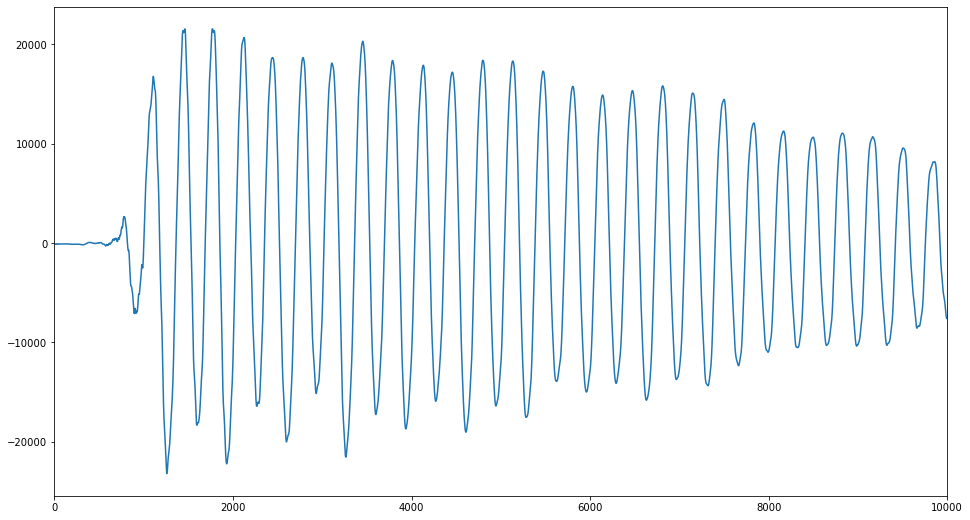

In [6]:
pp.figure(figsize=(16,9))
pp.plot(x)
pp.xlim([0,10000])

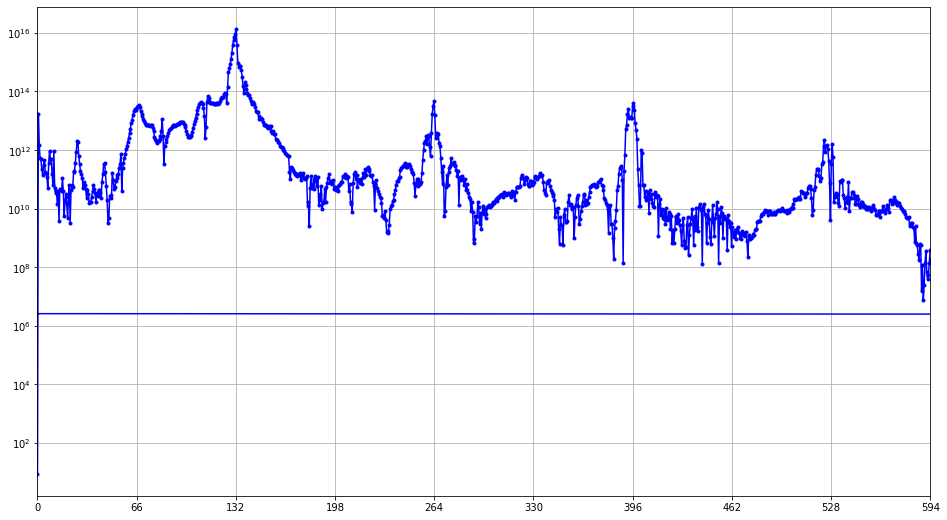

In [15]:
y = fft(x)
f = fftfreq(len(x), 1/sr)
pp.figure(figsize=(16,9))
pp.plot(f, abs(y**2), 'b.-')
pp.xlim([0,500])
pp.yscale("log")
pp.xticks(np.arange(10)*132/2)
pp.grid()

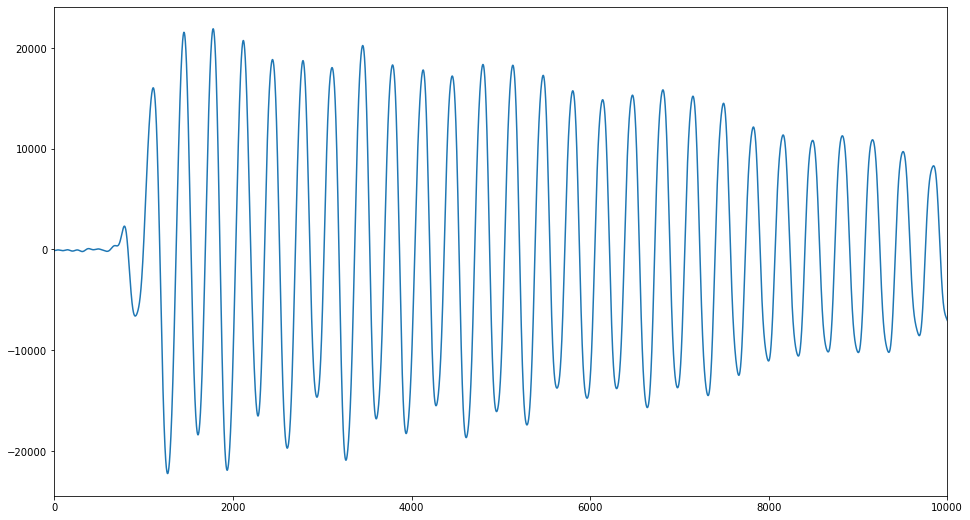

In [24]:
sr,x = wav.read("string_example.wav")
y = fft(x)
f = fftfreq(len(x), 1/sr)
y[abs(f) > 400] = 0
z = np.real(ifft(y))
pp.figure(figsize=(16,9))
pp.plot(z)
pp.xlim([0,10000])
wav.write("test.wav", sr, z.astype('int16'))